# Ausreißer (Boxplot)
Wir erstellen mit ein paar Beispielwerten ein Boxplot-Diagramm mit Matplotlib.

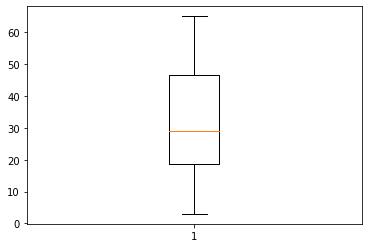

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

daten = [3, 9, 17, 23, 27, 31, 42, 48, 57, 65]
__=plt.boxplot(daten)

Wir geben die Quantile aus:

In [2]:
import numpy as np
np.quantile(daten, [0.25, 0.5, 0.75])

array([18.5, 29. , 46.5])

Wir wenden dies auf den Datensatz *cars* an und erstellen Boxplot-Diagramme für die Verbräuche (*mpg*) für die Kategorie *cyl* (Anzahl Zylinder).

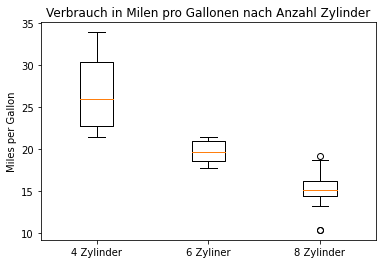

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as m

url = "https://raw.githubusercontent.com/troescherw/datasets/master/cars.csv"
cars = pd.read_csv(url, delimiter=";")

cyl4 = cars.loc[cars.cyl==4]
cyl6 = cars.loc[cars.cyl==6]
cyl8 = cars.loc[cars.cyl==8]

 
box_plot_data=[cyl4.mpg,cyl6.mpg,cyl8.mpg]
plt.boxplot(box_plot_data, labels=["4 Zylinder", "6 Zyliner", "8 Zylinder"])
plt.title("Verbrauch in Milen pro Gallonen nach Anzahl Zylinder")
plt.ylabel("Miles per Gallon")
plt.show()

Tipp: Mit *seaborn* können auf einfachere Weise ansehnliche Boxplot-Diagramme erstellt werden.

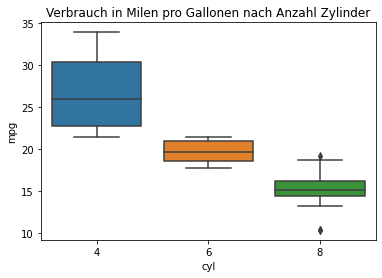

In [4]:
import seaborn as sns
_=sns.boxplot(x=cars.cyl, y=cars.mpg, data=cars).set_title("Verbrauch in Milen pro Gallonen nach Anzahl Zylinder")

Wir entfernen nun Ausreißer, in dem wir alle Daten, die mehr als 1,5 * dem IQR vom unteren bzw. oberen Quartil entfernt sind, aus dem Datensatz entfernen. Verwenden wir hierzu die Autos mit 8 Zylindern:

<AxesSubplot:ylabel='mpg'>

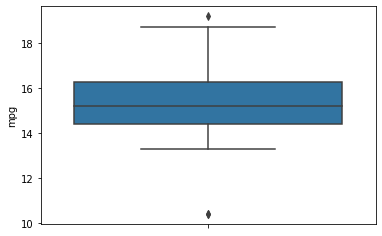

In [74]:
autos8cyl = cars.loc[cars.cyl==8]
sns.boxplot(y=autos8cyl.mpg)

In [121]:
# Ermittle unteres und oberes Quartil
q1 =  autos8cyl.mpg.quantile(q=.25)
q3 =  autos8cyl.mpg.quantile(q=.75)
iqr = q3 - q1
print("IQR=", iqr)
df_no_outliers = autos8cyl.mpg[(autos8cyl.mpg > q1 - 1.5*iqr) & (autos8cyl.mpg < q3 + 1.5*iqr)]
df_no_outliers



IQR= 1.8499999999999979


4     18.7
6     14.3
11    16.4
12    17.3
13    15.2
16    14.7
21    15.5
22    15.2
23    13.3
28    15.8
30    15.0
Name: mpg, dtype: float64

## Ausreißer mit LOF (Local Outlier Factor)
Einfache Methode: Alle Werte, die (zum Beispiel) mehr als 1,5 Standardabweichungen "entfernt" liegen, werden als Ausreißer definiert (man kann natürlich auch 2 oder sogar 3 Standardabweichungen einsetzen).

Mit der Funktion *zscore* ermitteln wir die Standardabweichungen der normierten Daten. Wir benötigen den Absolutwert, da uns nur die Entfernung interessiert - egal ob die Daten zu groß oder zu klein sind. Durch Vergleich mit z.B. 1.5 ergeben sich True- bzw.Falsewerte. Damit selektieren wir die Daten im DataFrame.

In [36]:
from scipy import stats
import pandas as pd

df = pd.DataFrame({"Daten":[5,4,2,4,5,7,1,4,150,4,3,2,4]}) # 150 = Ausreißer
df[np.abs(stats.zscore(df)) < 1.5]


,Daten
0,5
1,4
2,2
3,4
4,5
5,7
6,1
7,4
9,4
10,3


Eine häufig angewandte Größe, um Ausreißer zu bestimmen, nennt sich LOF (Local Outlier Factor). Hier wird die "Dichte" der Daten ermittelt, also die Anzahl der in einer bestimmten Umgebung anzutreffenden Datenpunkte. Ist ein Punkt zu weit von diesen "Clutern" entfernt, also die Dichte zu gering, so liegt ein Ausreißer vor.

Hier verwenden wir hierfür die Klasse *LocalOutlierFactor*. Wir erstellen ein Objekt und übergeben die Methode *fit_predict* unsere Daten. Im Modell wird eine 1 gespeichert, falls es sich um einen Ausreißer handelt, ansonsten eine -1.

Standardmäßig werden Cluster von mindestens 20 Objekten erwartet. Da unser Beispiel viel weniger Datenpunkte hat, setzen wir hierfür den Wert auf 5.

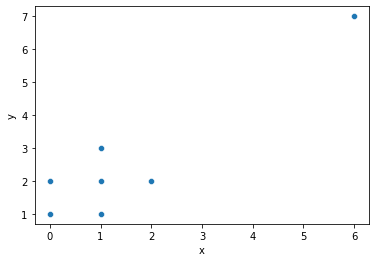

In [48]:
import seaborn as sns
df = pd.DataFrame(np.array([[0,1], [1,1], [1,2], [1,3], [0,2],[2,2], [6,7]]), columns = ["x", "y"])
_=sns.scatterplot(x=df.x, y=df.y)

In [68]:
from sklearn.neighbors import LocalOutlierFactor

outlier_model = LocalOutlierFactor(n_neighbors=5).fit_predict(df)
print("Ergebnis: 1=Kein Ausreißer, -1 = Ausreißer: ", outlier_model)
print("Keine Ausreißer:")
print(df[outlier_model==1])
print("Ausreißer:")
print(df[outlier_model==-1])

Ergebnis: 1=Kein Ausreißer, -1 = Ausreißer:  [ 1  1  1  1  1  1 -1]
Keine Ausreißer:
   x  y
0  0  1
1  1  1
2  1  2
3  1  3
4  0  2
5  2  2
Ausreißer:
   x  y
6  6  7
